In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df = pd.read_csv('movieTrain.csv')

In [3]:
pd.set_option("display.max_columns", 999)
#pd.set_option("display.max_rows", 999)

Lets look at revenue

In [4]:
df.revenue.describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

C:\Users\bpere\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


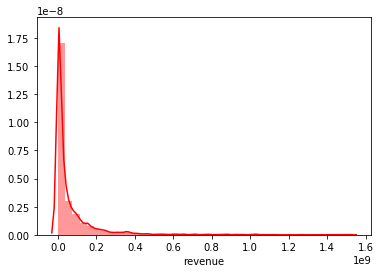

In [5]:
sns.distplot(df['revenue'],bins=40,color='r')

In [6]:
for ind, val in enumerate(df.revenue):
    if val == 1:
        print(ind)

347
1754
1874
1917


In [7]:
df.loc[347]

id                                                                     348
belongs_to_collection                                                  NaN
budget                                                                  12
genres                   [{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...
homepage                                                               NaN
imdb_id                                                          tt0118172
original_language                                                       en
original_title                                     The Wind in the Willows
overview                 Jailed for his reckless driving, rambunctious ...
popularity                                                         1.41032
poster_path                               /nsOM52BsDeHzc0yI27bah2OWems.jpg
production_companies           [{'name': 'Allied Filmmakers', 'id': 1755}]
production_countries      [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
release_date             

these are defintely outliers the website is either missing info or it is being transferred incorrectly

In [19]:
list = []
for ind, val in enumerate(df.revenue):
    if val < 100000:
        list.append(ind)
# for i in list:
#     print(df.loc[i],'\n\n')
len(list)

232

In [33]:
list = []
list2 = []
for ind, val in enumerate(df.budget):
    if val == 0:
        list.append(ind)
dft = df.drop(list)
dft.reset_index(inplace=True, drop=True)
print(len(list))
for ind, val in enumerate(dft.revenue):
    if val < 100000:
        list2.append(ind)
print(len(list2))
for i in list2:
    print(dft.loc[i],'\n')

812
89
id                                                                      16
belongs_to_collection                                                  NaN
budget                                                              500000
genres                   [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
homepage                             http://skinningmovie.com/synopsis.htm
imdb_id                                                          tt1129437
original_language                                                       sr
original_title                                                     Šišanje
overview                 Novica is a mathematics champion in a Belgrade...
popularity                                                         1.01848
poster_path                               /88l8VBanH0lS5Wvzu2qgkGcsfQi.jpg
production_companies                 [{'name': 'Hypnopolis', 'id': 51316}]
production_countries              [{'iso_3166_1': 'RS', 'name': 'Serbia'}]
release_date      

I think i have to throw out all the ones with no budget becasuse it is an important feature and it is wrong  
I also am going to drop all the movies with revenue under 100k becasue this  just sounds wrong

## Initial feature selection and extraction

In [ ]:
df.head()

possible ideas:  
how mny words in title  
gender of lead role  

In [ ]:
df.info()

In [ ]:
df.status.unique()

In [ ]:
for i in range(3000):
    if df.status[i] == 'Rumored':
        print(df.revenue[i])

I am going to drop some things:  
    id: irrelevant,    
    poster path: irrelevant,  
    status: seems to be wrong,  
    imbd id: irrelevant,  
    overview: irrelevant  
    title: irrelevant but will drop later
    oringinal title: irrelevant

In [ ]:
df1 = df.drop(['id','poster_path','status','imdb_id','overview','original_title','Keywords'], axis=1)
#df1.head()

I am going to start creating some dummy varibales for belongs to collection

In [ ]:
df1.belongs_to_collection.fillna(0,inplace=True)
collect = []
for i in range(3000):
    if df1.belongs_to_collection[i] == 0:
        collect.append(0)
    else:
        collect.append(1)
df1['belongs_to_collection1'] = collect
df1.drop('belongs_to_collection',axis=1,inplace=True)

now for homepage

In [ ]:
df1.homepage.fillna(0,inplace=True)
home = []
for i in range(3000):
    if df1.homepage[i] == 0:
       home.append(0)
    else:
        home.append(1)
df1['homepage1'] = home
df1.drop('homepage',axis=1,inplace=True)


tagline

In [ ]:
df1.tagline.fillna(0,inplace=True)
tag = []
for i in range(3000):
    if df1.tagline[i] == 0:
        tag.append(0)
    else:
        tag.append(1)
df1['tagline1'] = tag
df1.drop('tagline',axis=1,inplace=True)

Now for the language

In [ ]:
df1['original_language1'] = pd.factorize(df1.original_language)[0]
df1.drop('original_language',axis=1,inplace=True)

there is still some NaN but I will drop all, because there are very few

In [ ]:
df2=df1.dropna(how='any')
df2.reset_index(inplace=True, drop=True)


Now for genres, I am only loking at first 2 genres and concateneating them into a unique string which I will use as a dummy variable

In [ ]:
#gets a inique value for first 2 genres
gen = []
for i in range(len(df2.genres)):
    genre1 = df2.genres[i][8:10]
    t = df2.genres[i].find("'id'",8)
    if t != -1:
        genre2 = df2.genres[i][t+6:t+8]
        if genre2 == genre1:
            gen.append(genre1)
        else:
            gen.append(genre1+genre2)
    else:
        gen.append(genre1)

In [ ]:
dft = pd.DataFrame(gen, columns=["genre1"])
df2['genres1'] = pd.factorize(dft.genre1)[0]
df2.drop('genres',axis=1,inplace=True)

Now release date, perhps encode season(1,2,3,4), and year maybe subtract form min so we dont have huge numbers, binary encode whther it was relesed on a holiday


In [ ]:
month = []
year = []
for i in range(len(df2.spoken_languages)):
    a = df2.release_date[i]
    b = a.find('/')
    c = a.find('/',b+1)
    d = float(a[c+1:])
    if d<=19:
        e = '20' + a[c+1:]
    else:
        e = '19' + a[c+1:]
    year.append(float(e))
    month.append(float(a[:b]))

In [ ]:
release_year = []
for i in year:
    release_year.append(i-1921.)
release_month = []
for i in month:
    if i <= 3:
        release_month.append(0)
    elif i>3 and i<=6:
        release_month.append(1)
    elif i>6 and i<=9:
        release_month.append(2)
    else:
        release_month.append(3)

In [ ]:
df2['release_month'] = release_month
df2['release_year'] = release_year
df2.drop('release_date', axis=1, inplace=True)

Now for porduction country, I will only look at first country and encode it

In [ ]:
prod_country = []
for i in range(len(df2.production_countries)):
    a = df2.production_countries[i]
    b = a.find(': ')
    prod_country.append(a[b+3:b+5])

In [ ]:
df2['production_country1'] = prod_country
df2['prod_country'] = pd.factorize(df2.production_country1)[0]
df2.drop('production_country1',axis=1,inplace=True)
df2.drop('production_countries', axis=1, inplace=True)

now for production companies, I will encode the first company only

In [ ]:
prod_com = []
for i in range(len(df2.production_companies)):
    a = df2.production_companies[i]
    b = a.find('name')
    c = a.find('id')
    prod_com.append(a[b+7:c-4])


In [ ]:
df2['production_comp'] = prod_com
df2['production_company'] = pd.factorize(df2.production_comp)[0]
df2.drop('production_comp',axis=1,inplace=True)
df2.drop('production_companies',axis=1,inplace=True)

now for spoken language, i will make it a binary variable 0 for one language and 1 for multiple languages

In [ ]:
lang = []
for i in range(len(df2.spoken_languages)):
    a = df2.spoken_languages[i].count('name')
    if a == 1:
        lang.append(0)
    else:
        lang.append(1)
df2['spoken_lang'] = lang
df2.drop('spoken_languages',axis=1,inplace=True)

## intial visulaization

In [ ]:
df2.insert(0,'revenue1',df2.revenue)

In [ ]:
df2.drop('revenue',axis=1, inplace=True)

In [ ]:
df2.head()

In [ ]:
corrmap = df2.drop(['title','cast','crew'],axis=1).corr()
corrmap

In [ ]:
sns.heatmap(corrmap, vmax=.8, square=True)

In [ ]:
k = 8 #number of variables for heatmap
cols = corrmap.nlargest(k, 'revenue1')['revenue1'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
cols

In [ ]:
sns.pairplot(df2[cols], size = 2.5)
plt.show();

## PCA

In [ ]:
#split data
X = df2.drop(['title','cast','crew','revenue1'],axis=1)
y = df2.revenue1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
#scale data
sc = StandardScaler()
sc.fit(X_train)
scX = sc.transform(X_train)
col = X.columns
dfscaled = pd.DataFrame(scX,columns=col)
dfscaled.head()

In [ ]:
pca = PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_)
a=np.cumsum(pca.explained_variance_ratio_)

In [ ]:
sortPCA = np.sort(pca.components_[0])
revSort = sortPCA[::-1]
pc1 = pd.Series(revSort, index=X.columns)
pc1

In [ ]:
sortPCA = np.sort(pca.components_[1])
revSort = sortPCA[::-1]
pc2 = pd.Series(revSort, index=X.columns)
pc2